In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [122]:


house_df = pd.read_csv('kc_house_data.csv')


## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [125]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression() 

#Your code:

model.fit(X, y)


#Hint: .fit()

LinearRegression()

Model: y = 269.46 * x + -32304.65


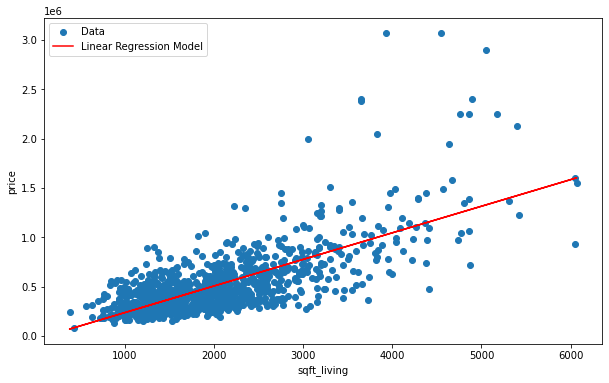

In [127]:
#b)

#Your code:
slope = model.coef_[0]
intercept = model.intercept_

print(f"Model: y = {slope:.2f} * x + {intercept:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data')
plt.plot(X, model.predict(X), color='red', label='Linear Regression Model')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.legend()
plt.show()

#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

In [129]:
#Scatter plot above, shoves price of the house depending on it's size. Red line is linear function which provides values.
#It looks allright becouse it's not a sureprise that bigger house should be more expensive.
#But this solution doesn't take a look at thgings like quality of the house

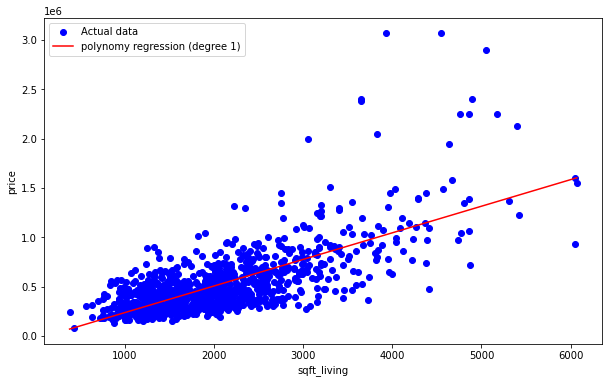

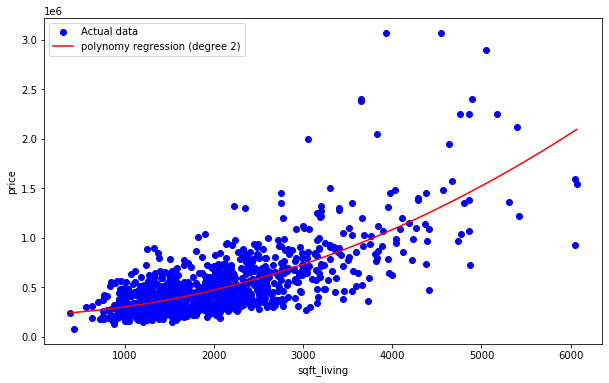

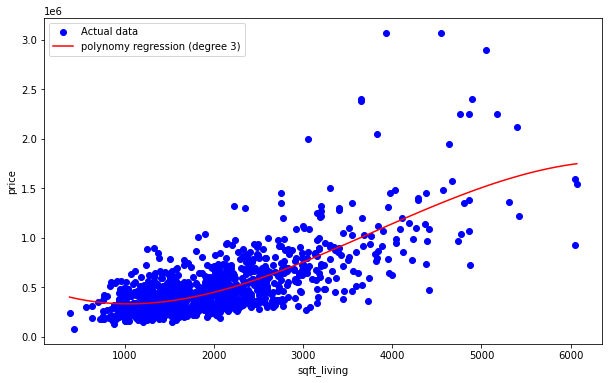

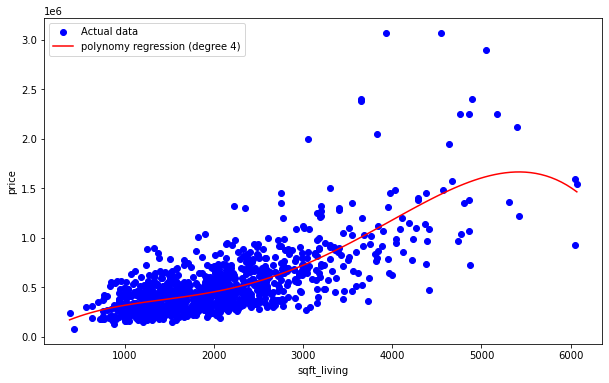

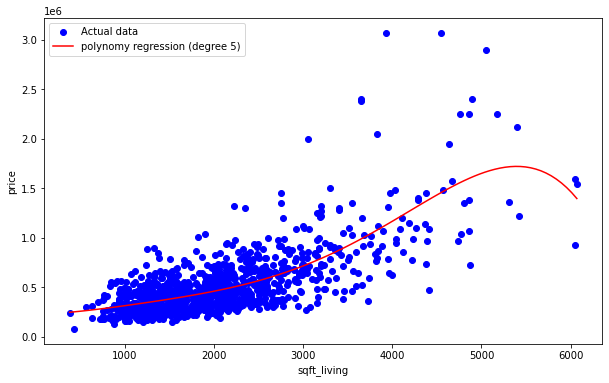

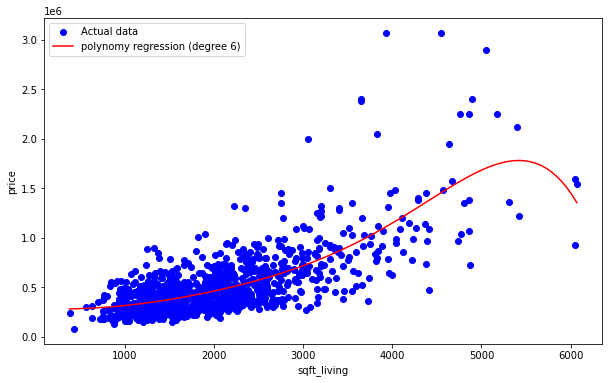

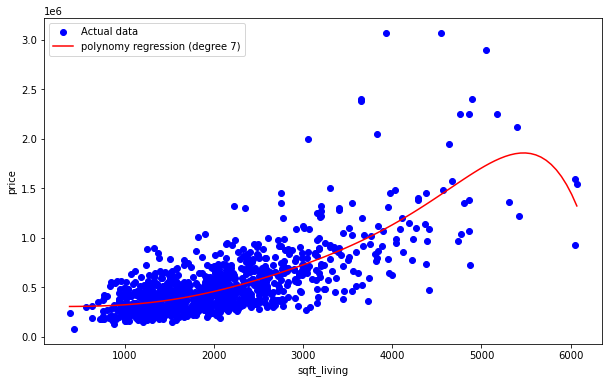

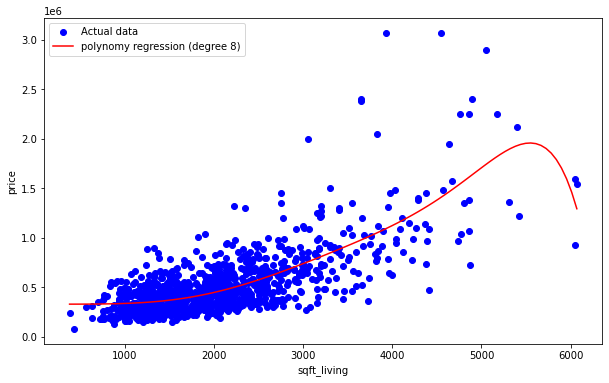

In [131]:
#c)

for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    #Your code:
    model = LinearRegression()
    model.fit(X_order, y)

    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_plot_order = poly.transform(X_plot)
    y_plot = model.predict(X_plot_order)

    # Wizualizacja modelu
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, label='Actual data', color='blue')
    plt.plot(X_plot, y_plot, label='polynomy regression (degree ' + str(order) + ')', color='red')
    plt.xlabel('sqft_living')
    plt.ylabel('price')
    plt.legend()
    plt.show()


In [133]:
#Now let's take a look at polynomies of higher degree. Tricky thing about them is fact that they want to change slope at some point.
#So we can see strange anomaly which shows that price should drastically drop when the house crosses the line of 5000 square feet.
#That's why very high degree works more like interpolation, which is not the effect we want to get.

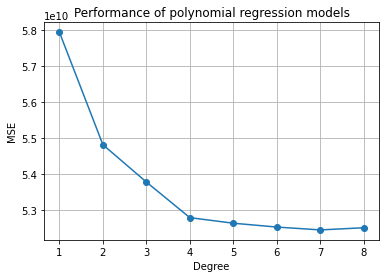

In [135]:
#Your code:
mse_values = []
degrees = range(1, 9)

for order in degrees:
    
    poly = PolynomialFeatures(order, include_bias=False)
    X_order = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_order, y)

    X_plot_order = poly.transform(X)
    y_pred = model.predict(X_plot_order)

    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

plt.plot(degrees, mse_values, marker='o')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.title('Performance of polynomial regression models')
plt.grid()
plt.show()



In [137]:
#Plot above shows that high degree polynomials work better and produce smaller MSE error.
#It's something we can't 100% rely on becouse it's a result of interpolation rhater than good regresion model
#So we should be very carfoul with this type of analyze

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

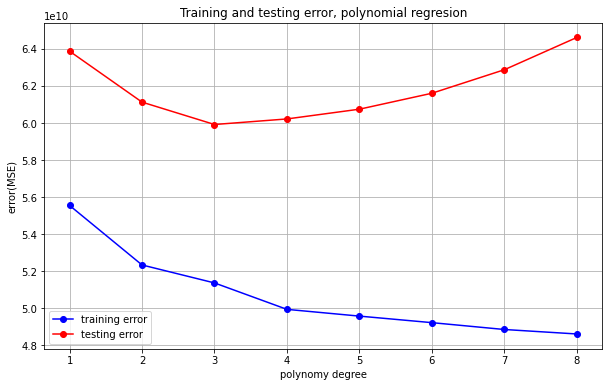

In [140]:
#a)

mse_train_values = []
mse_test_values = []
degrees = range(1, 9)

for order in degrees:
    poly = PolynomialFeatures(order, include_bias=False)
    X_order = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)

    y_test_pred = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_train_values, marker='o', label='training error', color='blue')
plt.plot(degrees, mse_test_values, marker='o', label='testing error', color='red')
plt.xlabel('polynomy degree')
plt.ylabel('error(MSE)')
plt.title('Training and testing error, polynomial regresion')
plt.legend()
plt.grid()
plt.show()


In [142]:
#not let's take a look what would happen if had some missing data. 70% of values worked as training data and 30% as testing. During training process
#we can see that high degree polynomies generate small MSE as I mentioned before.
#But in reality this type of model gives very poor results becouse testing data didn't fit there well so it gave highMSE.
#We must find best balance which to me is 2/3 degree.

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

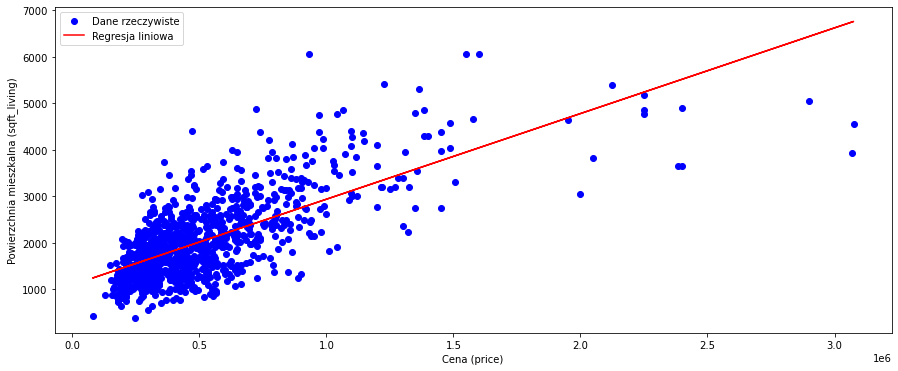

Mean squared error equals: 396407.1889615158


In [145]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:
model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(15, 6))
plt.scatter(X, y, label='Dane rzeczywiste', color='blue')
plt.plot(X, y_pred, label='Regresja liniowa', color='red')
plt.xlabel('Cena (price)')
plt.ylabel('Powierzchnia mieszkalna (sqft_living)')
plt.legend()
plt.show()
mse = mean_squared_error(y, y_pred)
print("Mean squared error equals: {0}".format(mse))


Mean squared error equals: 48749609526.92066
My Mean Squared Error equals: 47840169668.144684


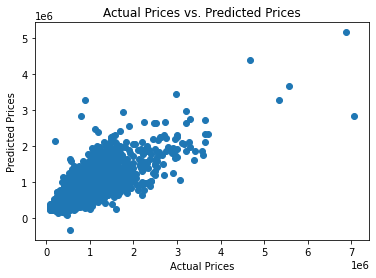

In [147]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:

#=================
X = house_df[['bathrooms','bedrooms', 'sqft_living','grade','condition','view','sqft_lot']].values.reshape(-1,7)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(2, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

model = LinearRegression() 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'My Mean Squared Error equals: {mse}')



plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()


In [ ]:
#I decided to use here ['bathrooms','bedrooms', 'sqft_living','grade','condition','view','sqft_lot'] which to me are most inportant to look for in a house
#and decided for square function polynomy. 